### Pairwise exploratory plots

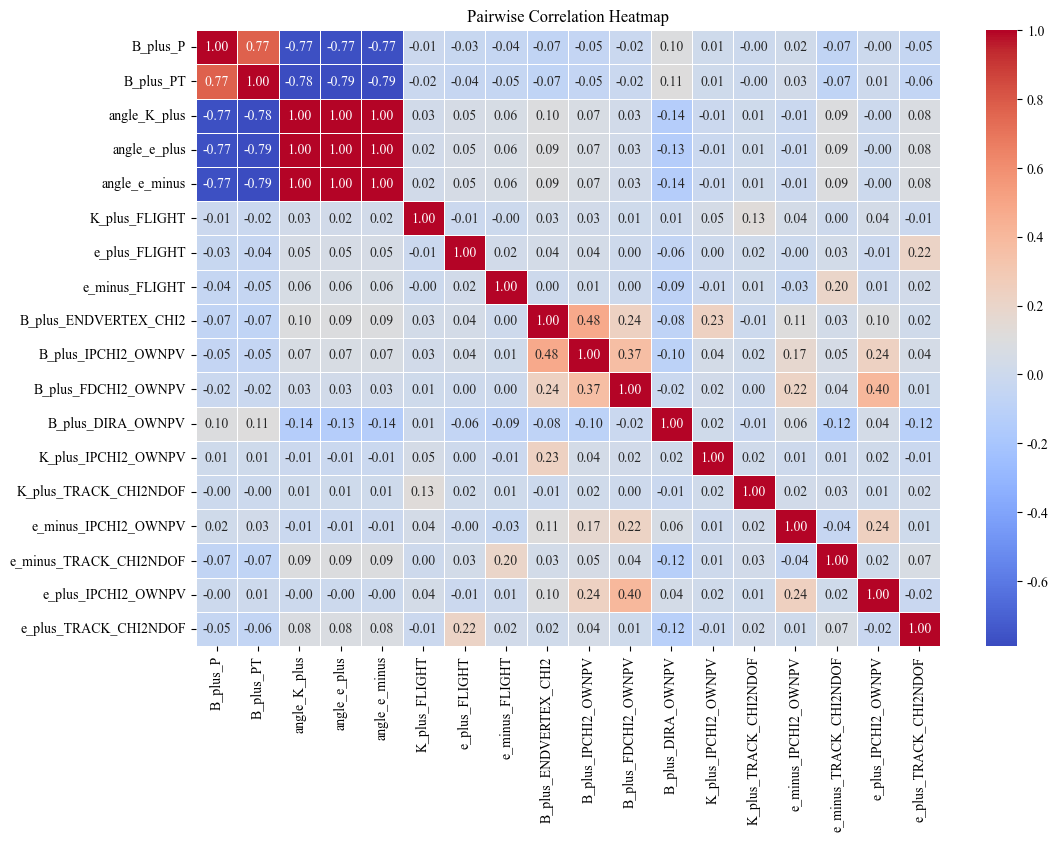

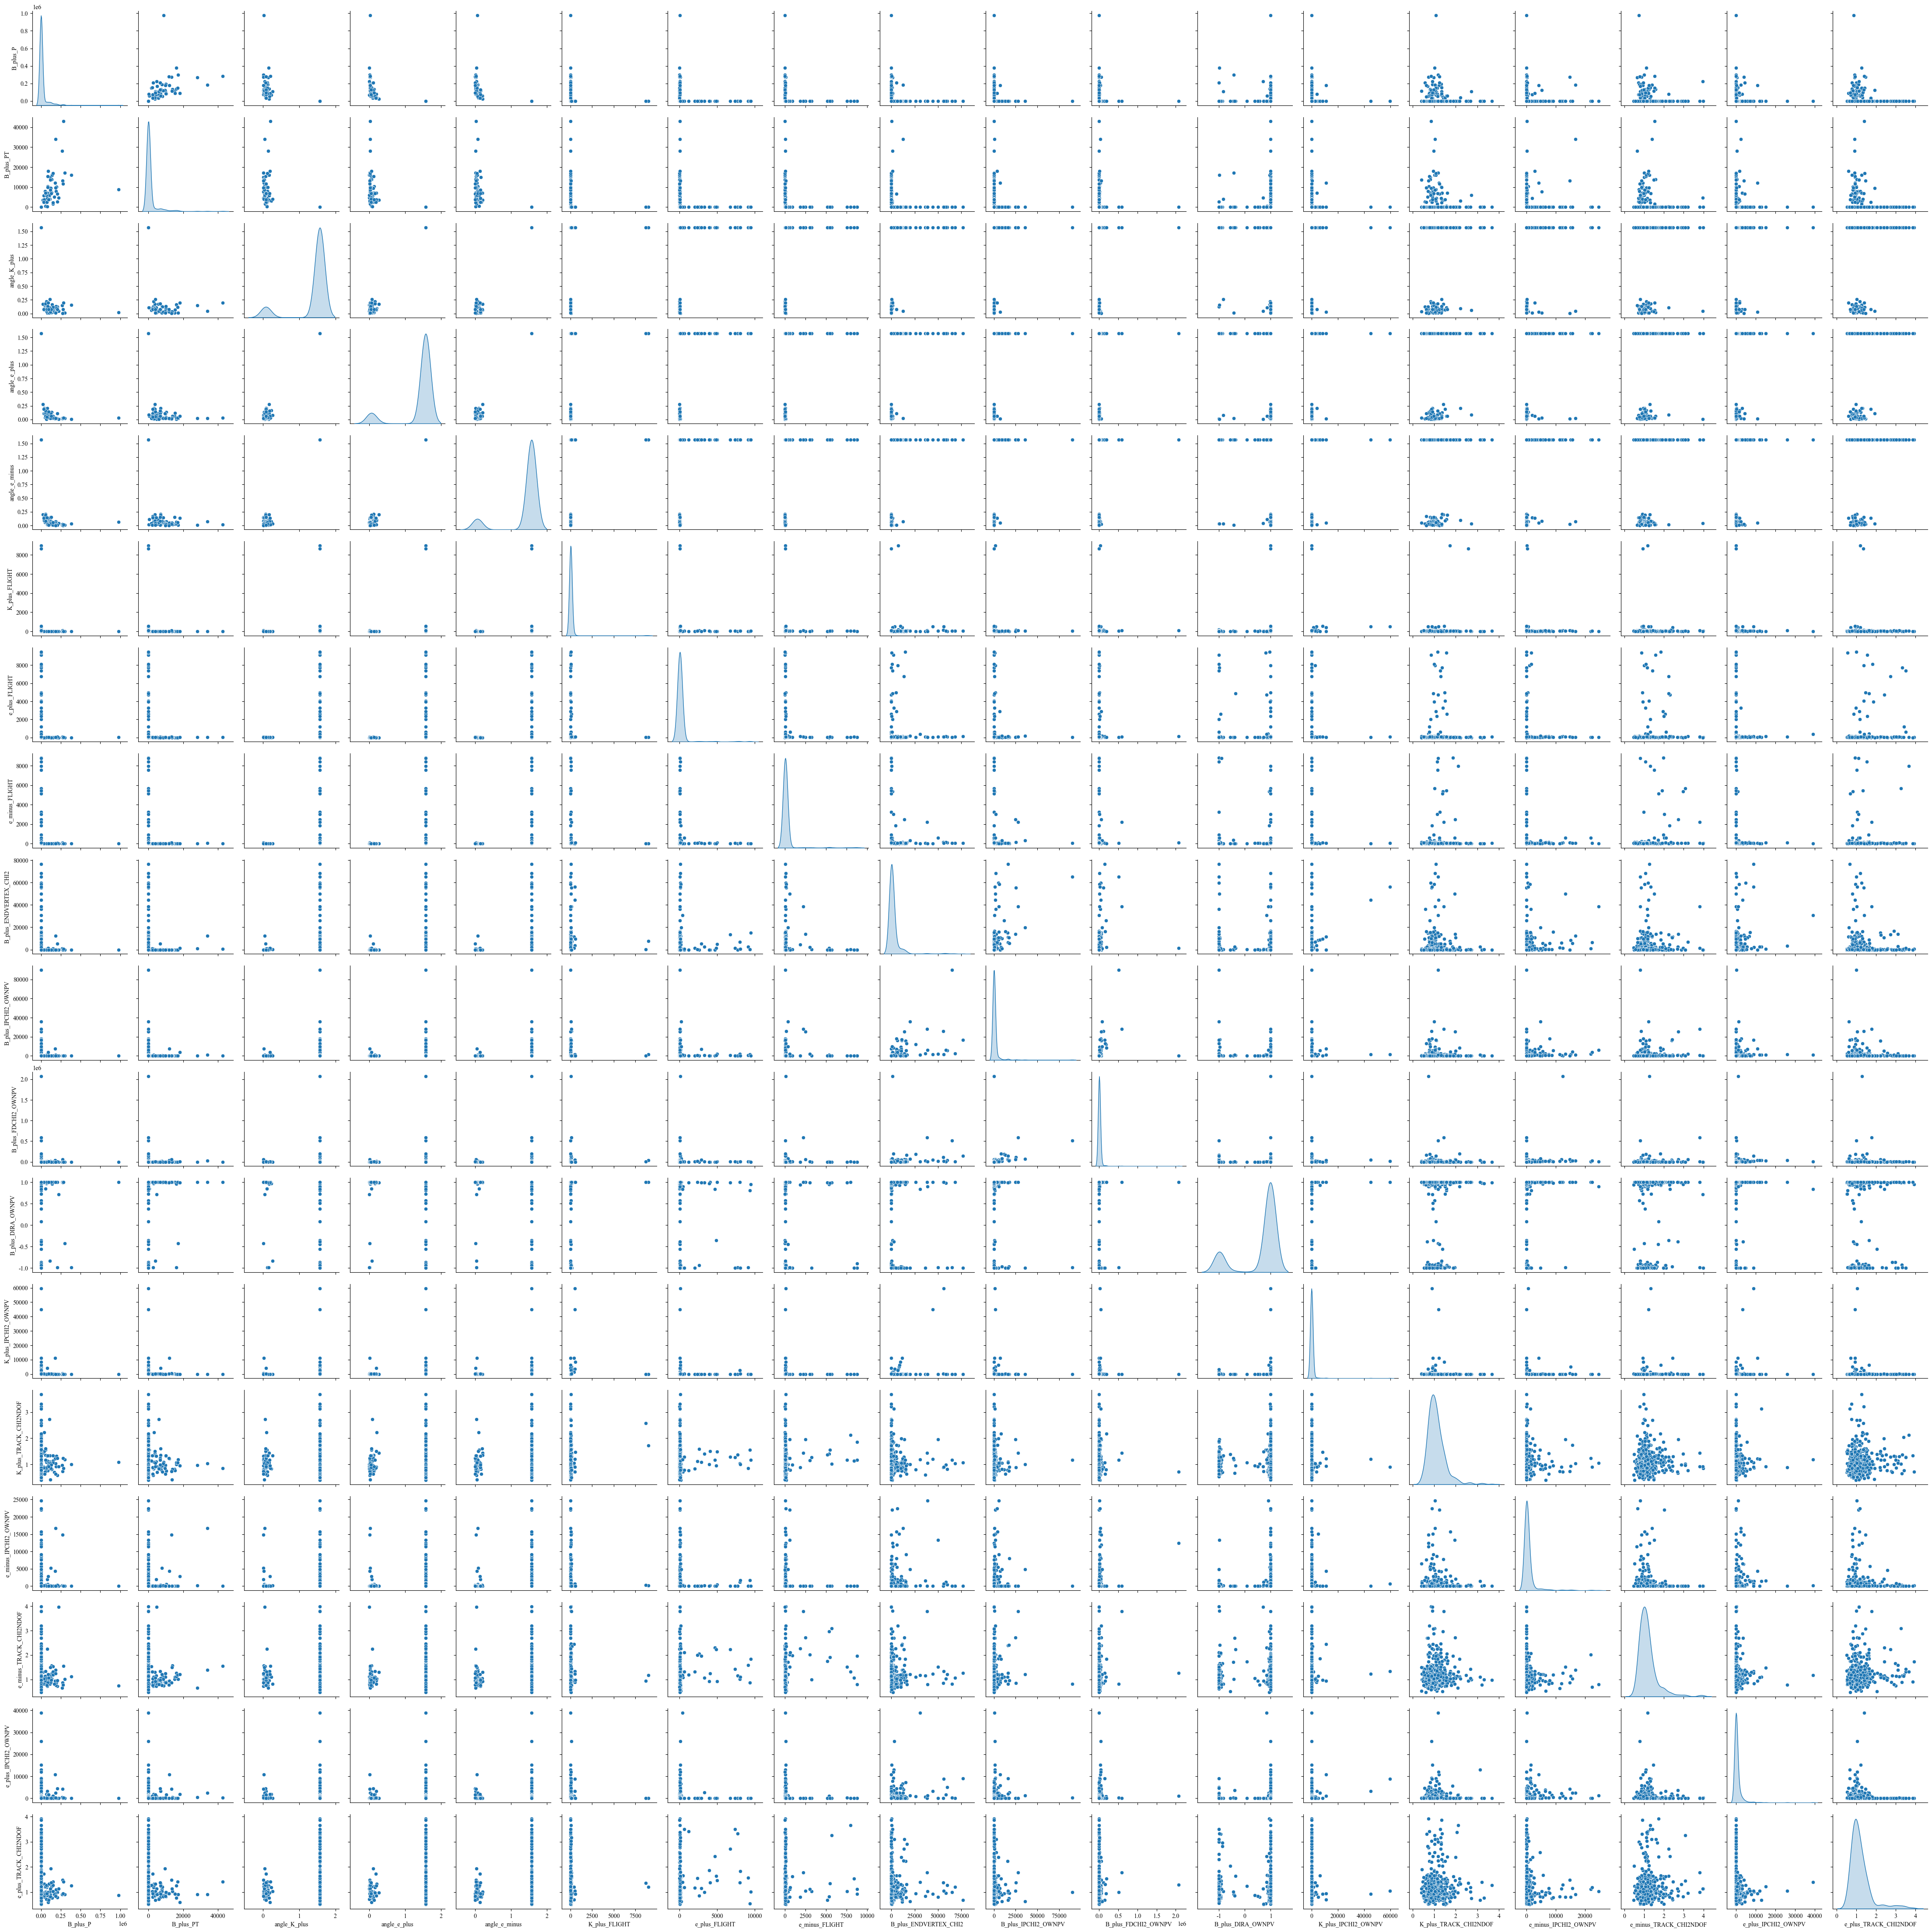

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uproot

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.unicode_minus"] = False  

file = uproot.open('/users/zw21147/ResearchProject/datasets/split/validation_renamed.root')
tree = file["DecayTree"] 
df = tree.arrays(library="pd")

# Define a subset of columns for correlation analysis
selected_columns = [
    "B_plus_P", "B_plus_PT", "angle_K_plus", "angle_e_plus", "angle_e_minus",
    "K_plus_FLIGHT", "e_plus_FLIGHT", "e_minus_FLIGHT", "B_plus_ENDVERTEX_CHI2",
    "B_plus_IPCHI2_OWNPV", "B_plus_FDCHI2_OWNPV", "B_plus_DIRA_OWNPV",
    "K_plus_IPCHI2_OWNPV", "K_plus_TRACK_CHI2NDOF", "e_minus_IPCHI2_OWNPV",
    "e_minus_TRACK_CHI2NDOF", "e_plus_IPCHI2_OWNPV", "e_plus_TRACK_CHI2NDOF"
]

# Ensure only available columns are used
df_subset = df[selected_columns].dropna()

# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pairwise Correlation Heatmap")
plt.show()

# Pairplot for exploratory visualization (subsampled for efficiency)
sns.pairplot(df_subset.sample(n=min(500, len(df_subset)), random_state=42), diag_kind="kde")
plt.show()


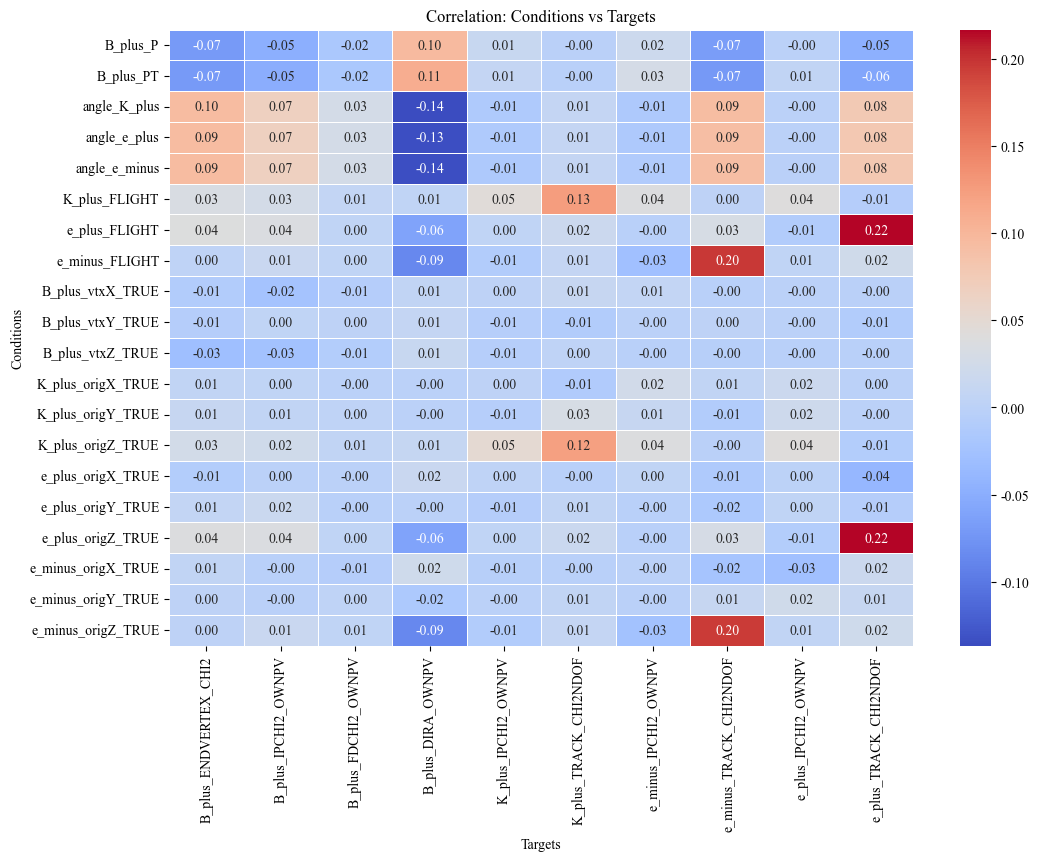

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define conditions and targets
conditions = [
    "B_plus_P", "B_plus_PT", "angle_K_plus", "angle_e_plus", "angle_e_minus",
    "K_plus_FLIGHT", "e_plus_FLIGHT", "e_minus_FLIGHT",
    "B_plus_vtxX_TRUE", "B_plus_vtxY_TRUE", "B_plus_vtxZ_TRUE",
    "K_plus_origX_TRUE", "K_plus_origY_TRUE", "K_plus_origZ_TRUE",
    "e_plus_origX_TRUE", "e_plus_origY_TRUE", "e_plus_origZ_TRUE",
    "e_minus_origX_TRUE", "e_minus_origY_TRUE", "e_minus_origZ_TRUE"
]

targets = [
    "B_plus_ENDVERTEX_CHI2", "B_plus_IPCHI2_OWNPV", "B_plus_FDCHI2_OWNPV",
    "B_plus_DIRA_OWNPV", "K_plus_IPCHI2_OWNPV", "K_plus_TRACK_CHI2NDOF",
    "e_minus_IPCHI2_OWNPV", "e_minus_TRACK_CHI2NDOF",
    "e_plus_IPCHI2_OWNPV", "e_plus_TRACK_CHI2NDOF"
]

# Ensure only available columns are used
available_conditions = [col for col in conditions if col in df.columns]
available_targets = [col for col in targets if col in df.columns]

df_subset = df[available_conditions + available_targets].dropna()

# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Extract only condition vs target correlations (no internal condition or target comparisons)
condition_target_corr = correlation_matrix.loc[available_conditions, available_targets]

# Plot heatmap of condition-target correlations
plt.figure(figsize=(12, 8))
sns.heatmap(condition_target_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation: Conditions vs Targets")
plt.xlabel("Targets")
plt.ylabel("Conditions")
plt.show()


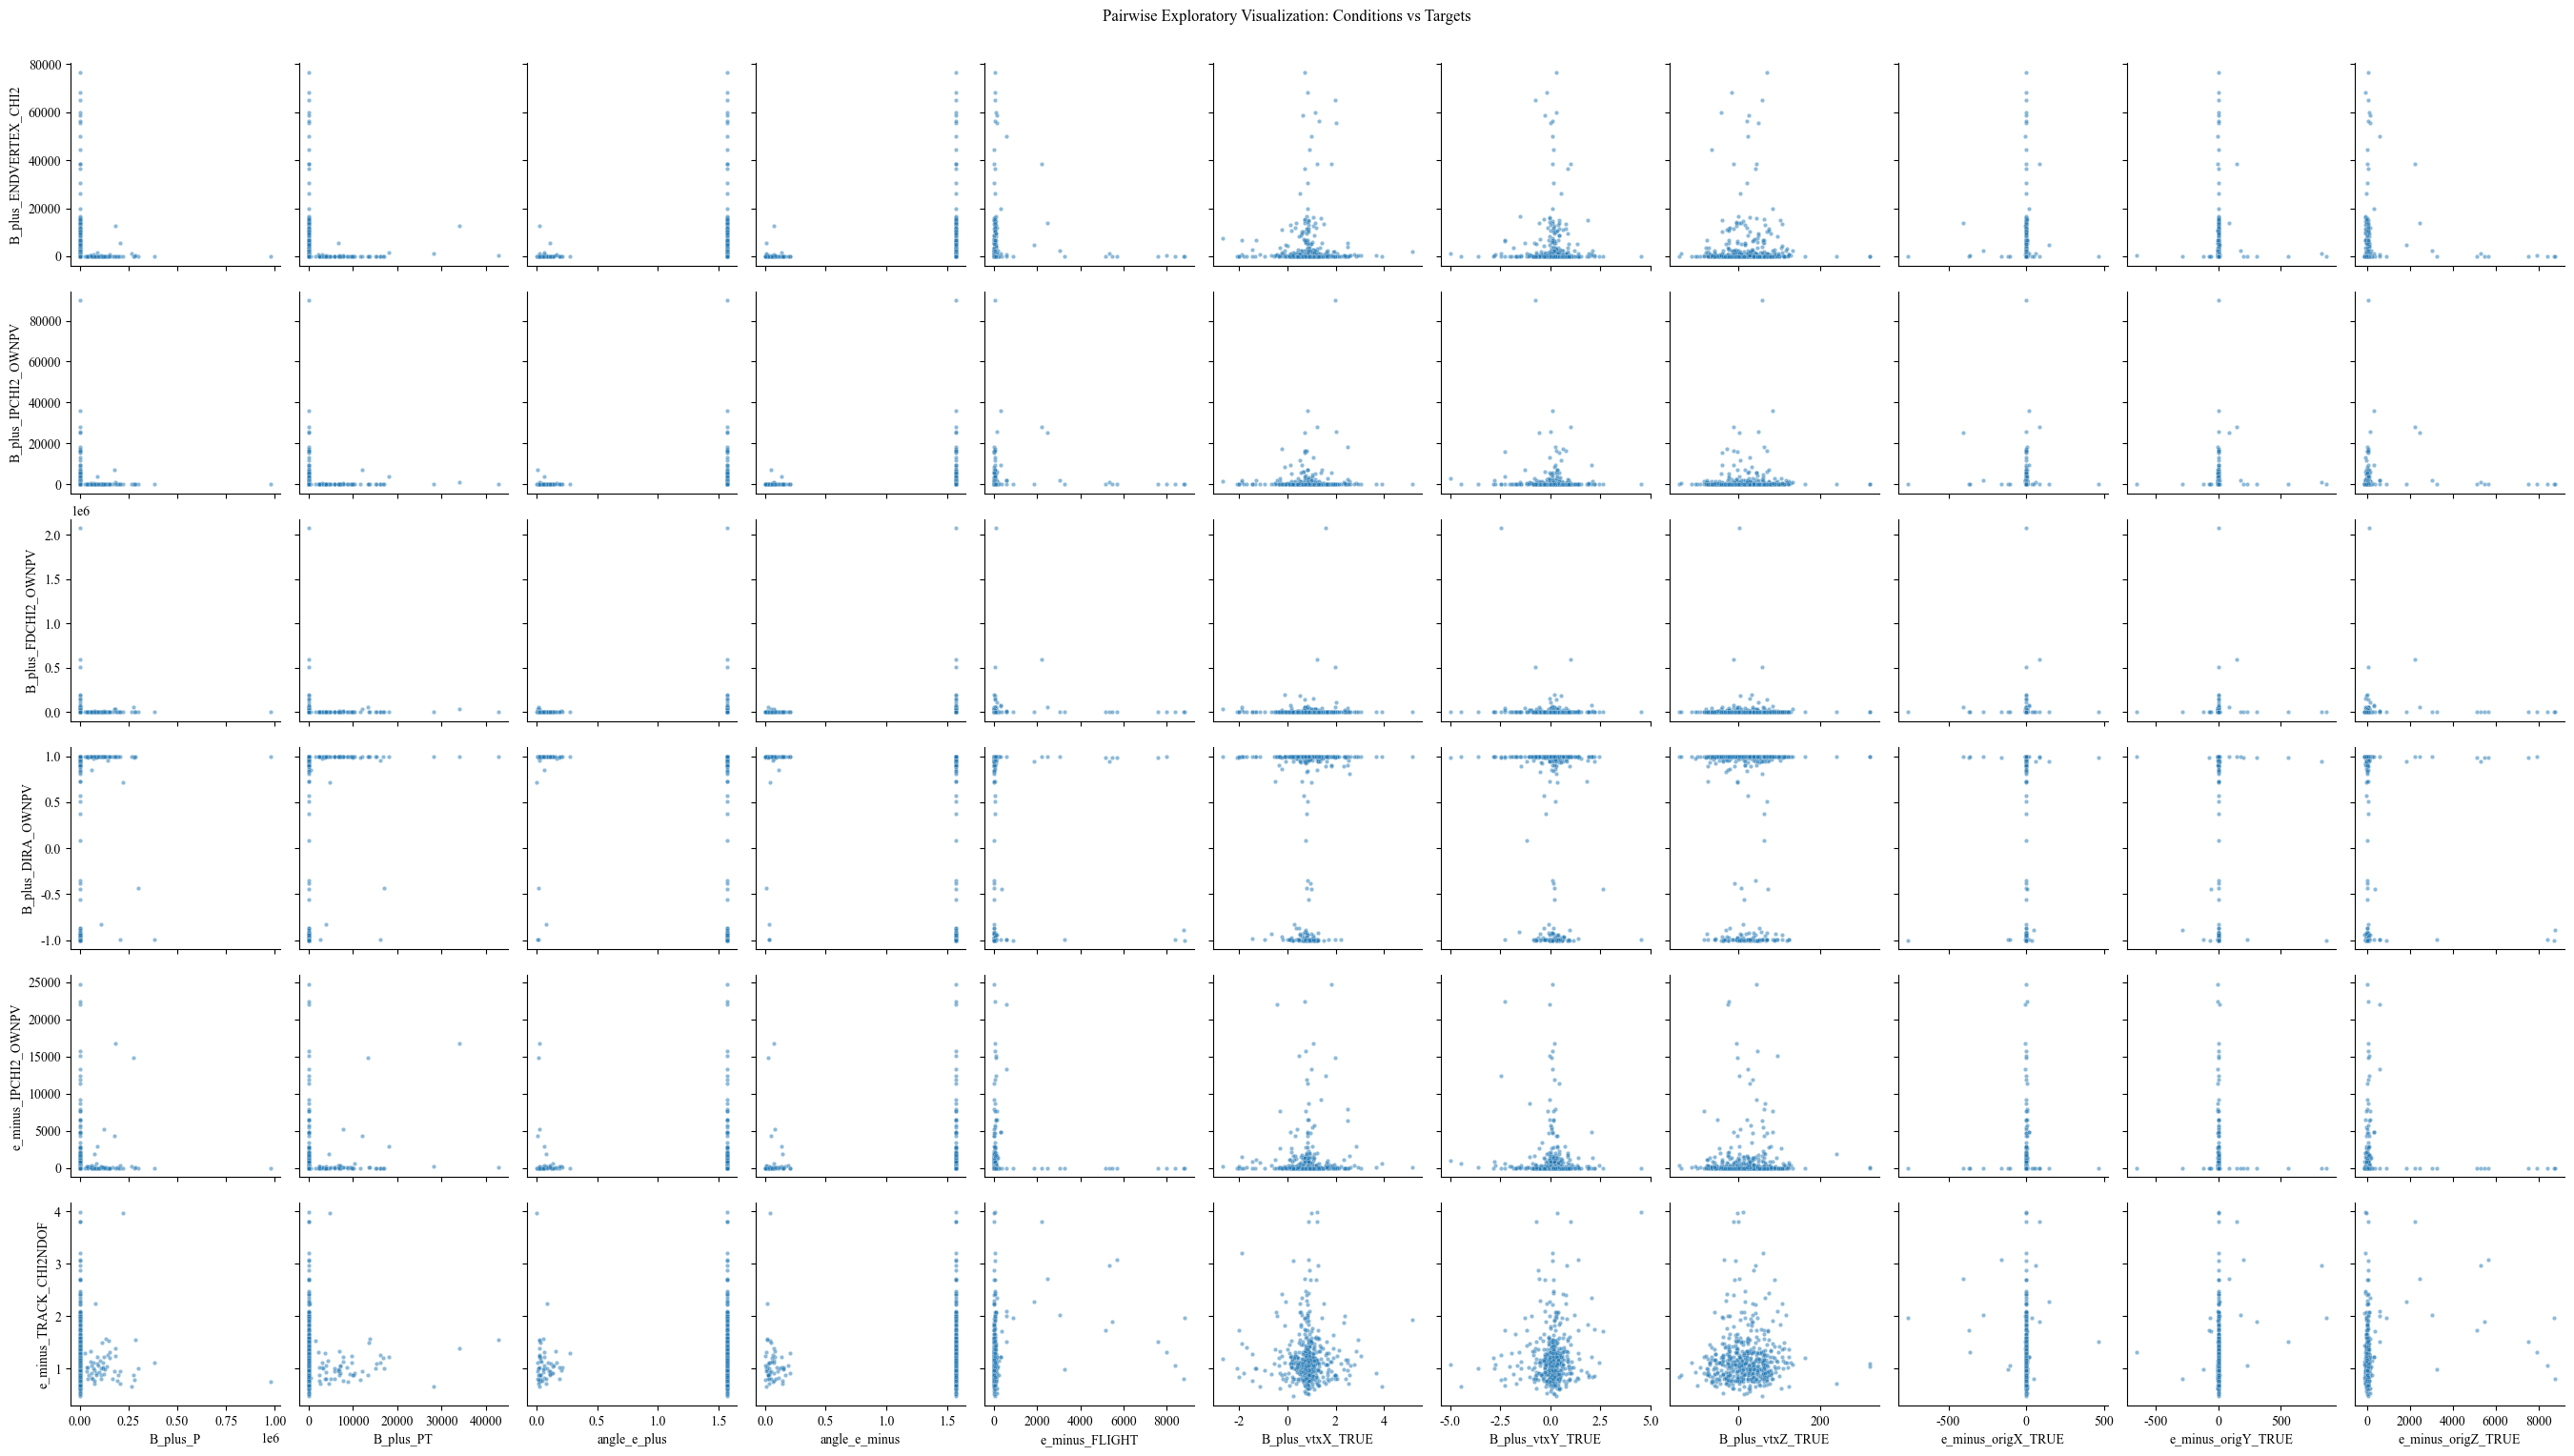

In [5]:
conditions = [
    "B_plus_P", "B_plus_PT", "angle_e_plus", "angle_e_minus", "e_minus_FLIGHT",
    "B_plus_vtxX_TRUE", "B_plus_vtxY_TRUE", "B_plus_vtxZ_TRUE",
    "e_minus_origX_TRUE", "e_minus_origY_TRUE", "e_minus_origZ_TRUE"
]

targets = [
    "B_plus_ENDVERTEX_CHI2", "B_plus_IPCHI2_OWNPV", "B_plus_FDCHI2_OWNPV",
    "B_plus_DIRA_OWNPV", 
    "e_minus_IPCHI2_OWNPV", "e_minus_TRACK_CHI2NDOF",
]

# Subsampling to speed up visualization 
sample_size = min(500, len(df_subset))  # Limit to 500 rows if dataset is large
df_sampled = df_subset.sample(n=sample_size, random_state=42)

# Create a pairplot for conditions vs targets
sns.pairplot(
    df_sampled,
    x_vars=conditions,  # Conditions on X-axis
    y_vars=targets,     # Targets on Y-axis
    diag_kind=None,                # Disable diagonal density plots
    plot_kws={'alpha': 0.5, 's': 10}  # Transparency and marker size
)

plt.suptitle("Pairwise Exploratory Visualization: Conditions vs Targets", y=1.02)
plt.show()

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure we have only the necessary columns
df_subset = df[conditions + targets].dropna()

# Subsampling for efficiency
sample_size = min(500, len(df_subset))  # Adjust if needed
df_sampled = df_subset.sample(n=sample_size, random_state=42)

# Apply PCA to the conditions
pca = PCA(n_components=1)  # Reduce to 2 principal components
conditions_pca = pca.fit_transform(df_sampled[conditions])

# Create a new dataframe with PCA components + targets
df_pca = pd.DataFrame(conditions_pca, columns=["PC1"])
df_pca[targets] = df_sampled[targets].reset_index(drop=True)  # Keep targets

# Print explained variance to check how much information is retained
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: PC1 = {explained_variance[0]:.2f}")


Explained Variance: PC1 = 1.00


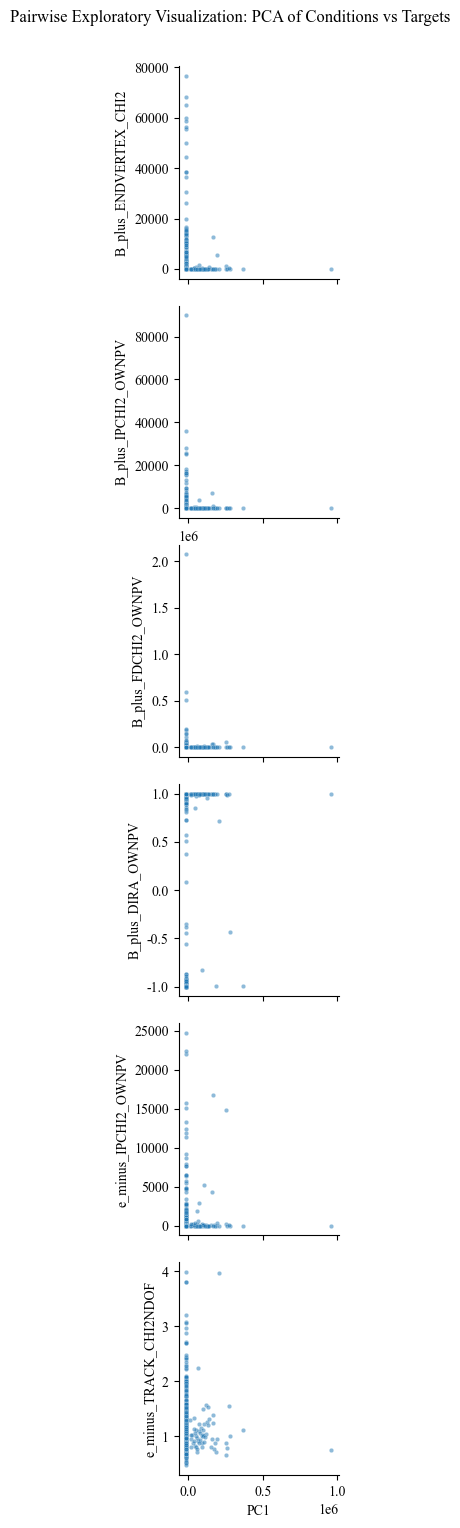

In [12]:
# Create a pairplot with PCA components vs targets
sns.pairplot(
    df_pca,
    x_vars=["PC1"],  # Reduced dimensions from conditions
    y_vars=targets,         # Original targets
    diag_kind=None,         # Disable density plots on diagonal
    plot_kws={'alpha': 0.5, 's': 10}
)

plt.suptitle("Pairwise Exploratory Visualization: PCA of Conditions vs Targets", y=1.02)
plt.show()
